In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from frouros.detectors.concept_drift import DDM, DDMConfig
from frouros.metrics import PrequentialError
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression

np.random.seed(seed=31)

In [8]:
data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv').head(100000)
data = data[['close']]
data = np.log(data / data.shift(1))
data = data.dropna()
scaler = StandardScaler()
scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
data['close'] = pd.Series(scaled_result.flatten())
data['target'] = data['close'].shift(-1).dropna()
print(data['target'].head())
data = data.dropna()

1   -0.256345
2    0.345629
3    2.151277
4   -1.288079
5    0.947458
Name: target, dtype: float64


In [9]:
X = data[['close']].values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.99, random_state=31)

In [14]:
model=SVR()
model.fit(X_train, y_train)

SVR()

In [11]:
config = DDMConfig(
    warning_level=2.6,
    drift_level=2.7,
    min_num_instances=1,  
)
detector = DDM(config=config)
metric = PrequentialError(alpha=1.0) 

In [12]:
def stream_test(X_test, y_test, y, metric, detector):
    drift_points = []
    for i, (X, y) in enumerate(zip(X_test, y_test)):
        y_pred = model.predict(X.reshape(1, -1))
        error = 1 - (y_pred.item() == y.item())
        metric_error = metric(error_value=error)      
        _ = detector.update(value=error)
        status = detector.status        
        if status["drift"]:  
            drift_points.append(i)  
            print(f"Concept drift detected at step {i}. Accuracy: {1 - metric_error:.4f}")
    if not drift_points:
        print("No concept drift detected")  
        
    print(f"Final accuracy: {1 - metric_error:.4f}\n")
    
    return drift_points  


In [13]:
drift_points = stream_test(
    X_test=X_test,
    y_test=y_test,
    y=y,
    metric=metric,
    detector=detector,
)

printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting error 1
printting 

/var/folders/l0/091nq6390xb96z8313zhyp4m0000gp/T/ipykernel_5168/2735684042.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['target'][-drift_size:] = data['target'][-drift_size:] + np.random.normal(0, 0.5, size=drift_size)


Warming up detector with 48997 samples
Index: 48997, Error rate: 1
Index: Error rate: 1
Drift detected at index: 48997


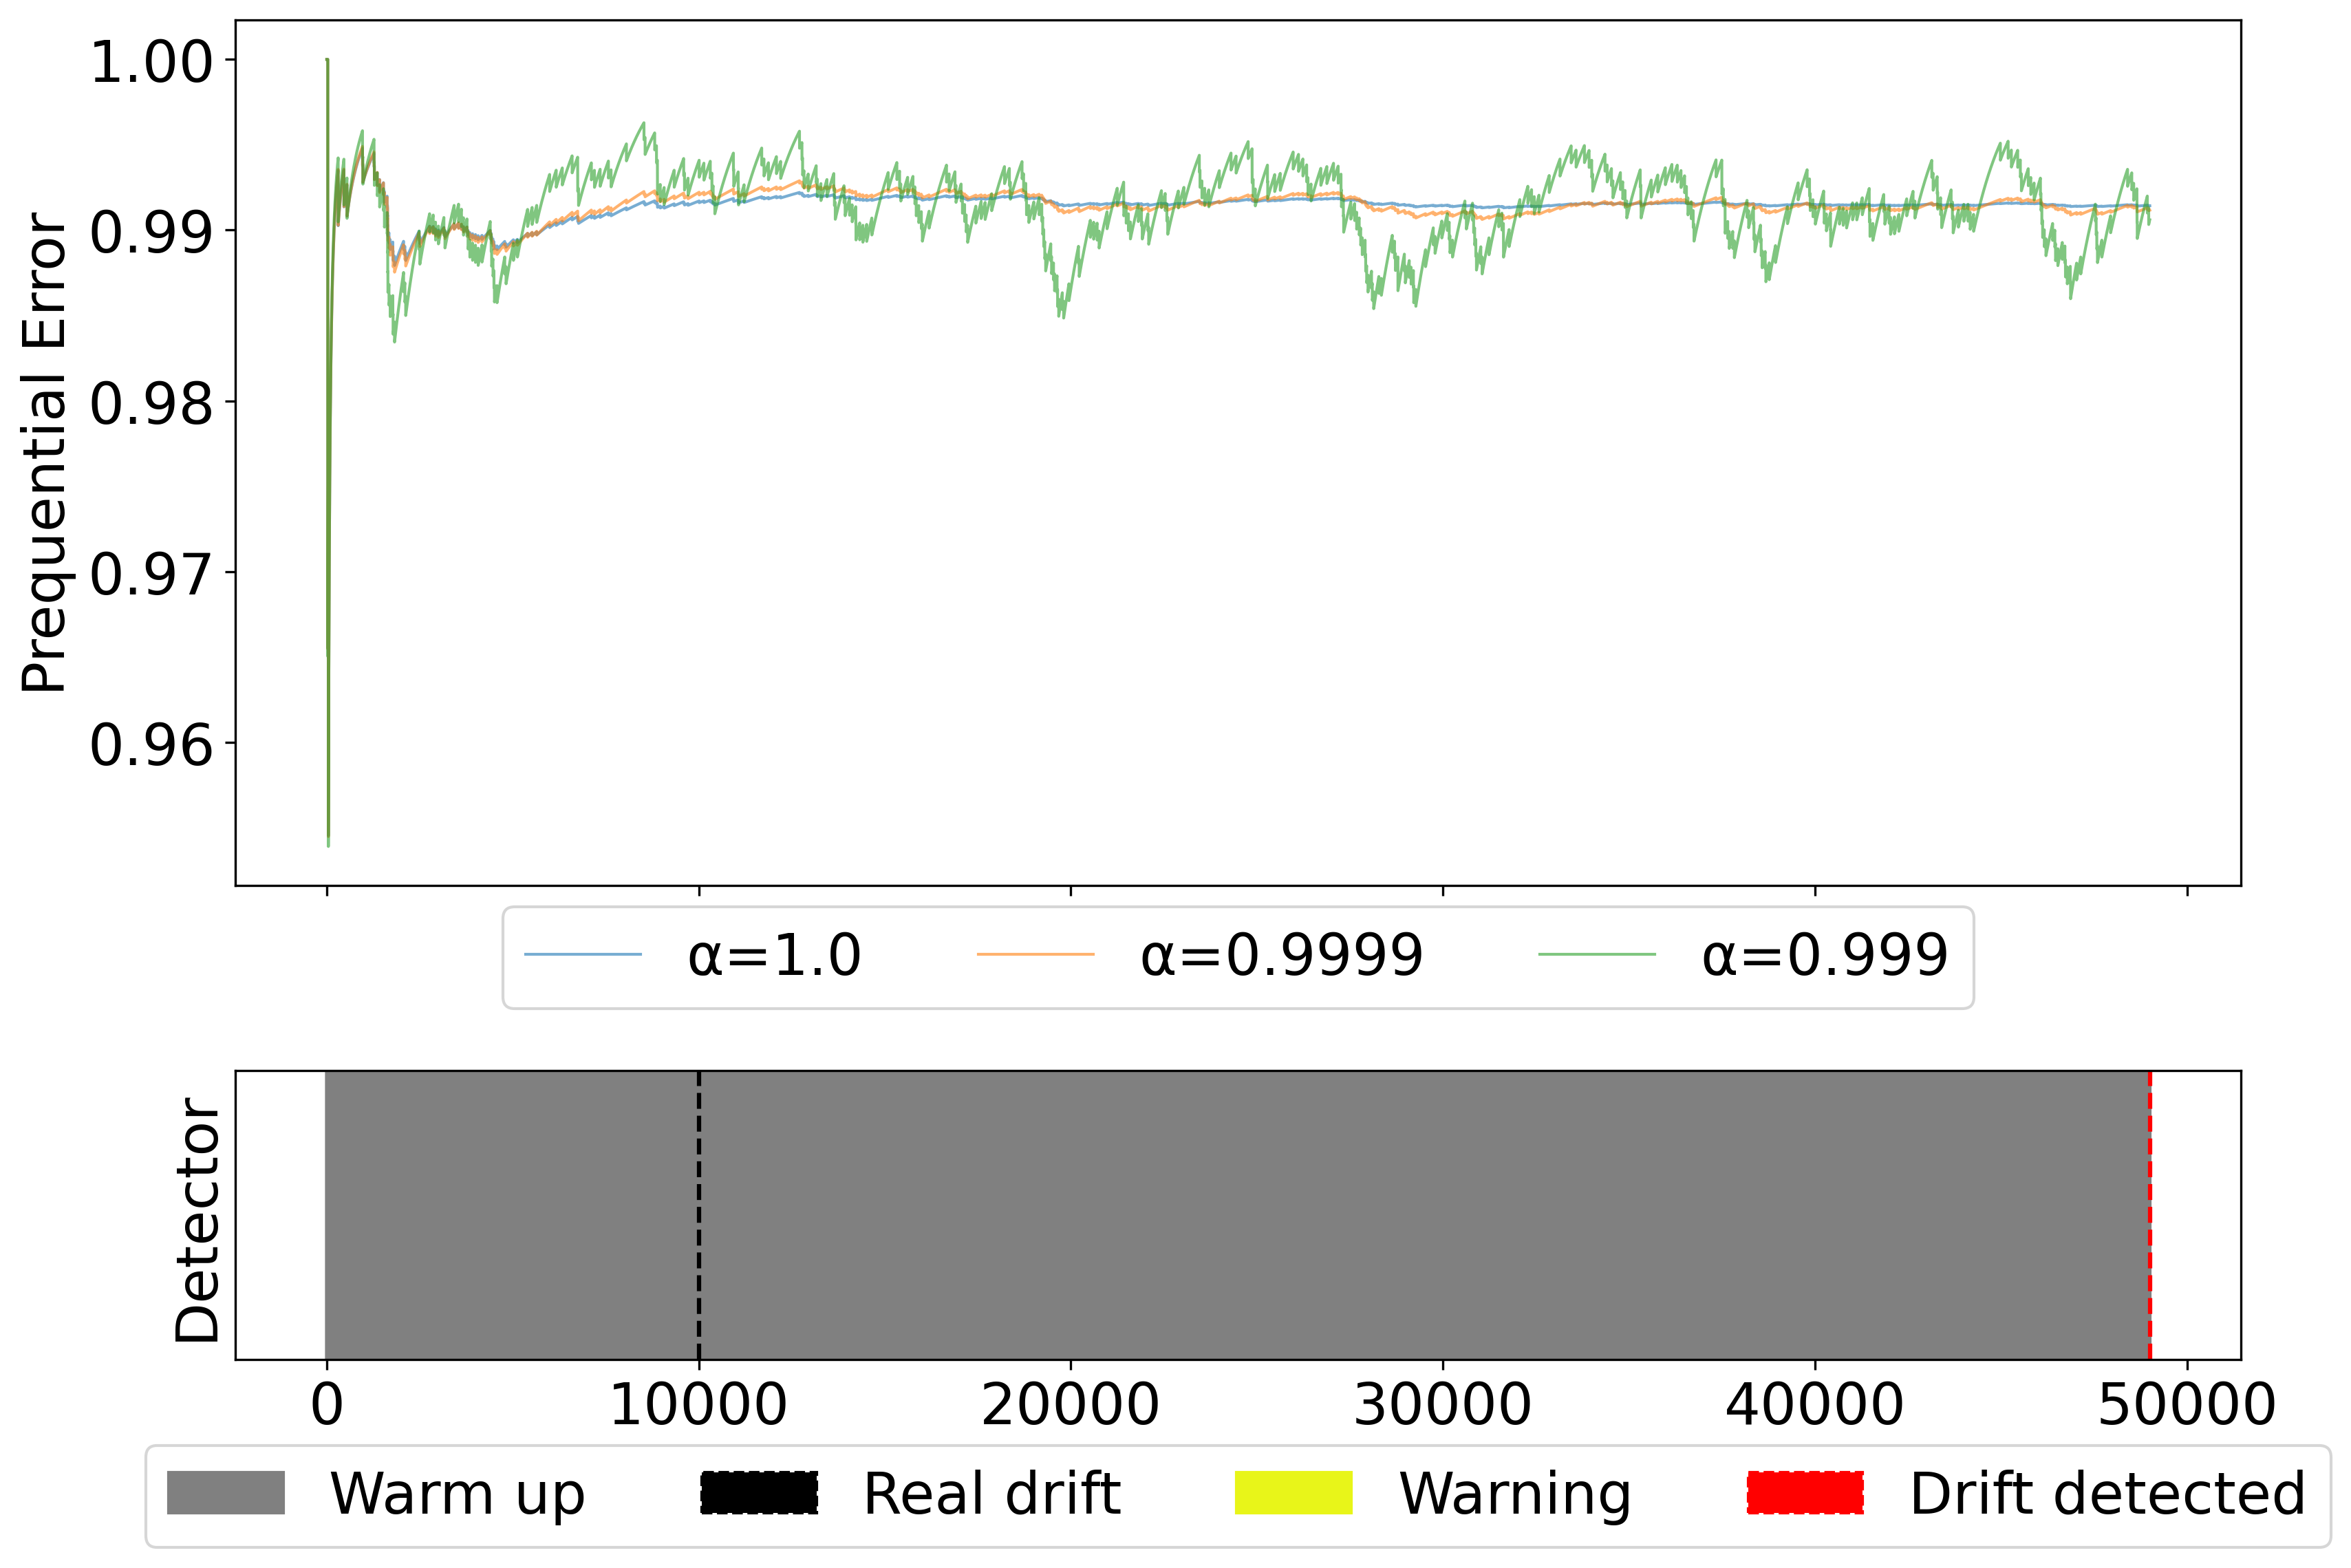

In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from frouros.detectors.concept_drift import DDM, DDMConfig
from frouros.metrics import PrequentialError
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(seed=31)

# Load and preprocess the data
data = pd.read_csv('EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv').head(100000)
data = data[['close']]
data = np.log(data / data.shift(1))
data = data.dropna()
scaler = StandardScaler()
scaled_result = scaler.fit_transform(data.values.reshape(-1, 1))
data['close'] = pd.Series(scaled_result.flatten())

# Create the target variable using the next day's close price
data['target'] = data['close'].shift(-1).dropna()
data = data.dropna()

# Introduce artificial drift in the last 20% of the data
drift_size = int(len(data) * 0.2)
data['target'][-drift_size:] = data['target'][-drift_size:] + np.random.normal(0, 0.5, size=drift_size)

# Split the data into features and target
X = data[['close']].values
y = data['target'].values

# Split train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=31)

# Further split train data for warm-up
X_warmup, X_train, y_warmup, y_train = train_test_split(X_train, y_train, train_size=0.7, random_state=31)

# Define and fit model
model = DecisionTreeRegressor(random_state=31)
model.fit(X=X_train, y=y_train)

# Detector configuration and instantiation
config = DDMConfig(
    warning_level=0.1,
    drift_level=0.2,
    min_num_instances=80,  
)
detector = DDM(config=config)

# Metric to compute accuracy
metrics = [
    PrequentialError(
        alpha=alpha,
        name=f"α={alpha}",
    )
    for alpha in [1.0, 0.9999, 0.999]
]
metrics_historic_detector = {f"{metric.name}": [] for metric in metrics}

def error_scorer(y_true, y_pred):  # Error function
    return 1 - (y_true.item() == y_pred.item())

# Warm-up detector
print(f"Warming up detector with {len(X_warmup)} samples")

for X, y in zip(X_warmup, y_warmup):
    y_pred = model.predict(X.reshape(1, -1))
    error = error_scorer(y_true=y, y_pred=y_pred)
    _ = detector.update(value=error)

    for metric_historic, metric in zip(metrics_historic_detector.keys(), metrics):
        metrics_historic_detector[metric_historic].append(metric(error))

idx_drift, idx_warning = [], []
for X, y in zip(X_test, y_test):
    y_pred = model.predict(X.reshape(1, -1))  # Model's prediction
    error = error_scorer(y_true=y, y_pred=y_pred)
    _ = detector.update(value=error)  # Detector's update

    # Print the error rate
    print(f"Index: Error rate: {error}")

    # All the following lines are optional and only used for plotting the whole process
    for metric_historic, metric in zip(metrics_historic_detector.keys(), metrics):
        metrics_historic_detector[metric_historic].append(metric(error))

    status = detector.status
    if status["drift"]:
        # Drift detected
        idx_drift.append(i)
        detector.reset()  # Reset detector
        for metric in metrics:  # Reset metrics
            metric.reset()
        break  # Stop simulation
    elif status["warning"]:
        # Warning zone
        idx_warning.append(i)
    i += 1

plt.rcParams.update({'font.size': 20})

alpha = 0.6
linewidth = 1.0

fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(12, 8),
    sharex=True,
    dpi=300,
    gridspec_kw={'height_ratios': [3, 1]},
)

for (metric_name, metric_values), linecolor in zip(
        metrics_historic_detector.items(),
        ["#1f77b4", "#ff7f0e", "#2ca02c"],
):
    ax[0].plot(metric_values,
               color=linecolor,
               linewidth=linewidth,
               alpha=alpha,
               label=metric_name)

drift_color = "red"
drift_linestyle = "--"
warmup_color = "grey"
warning_color = "#e8f519"
real_drift_color = "black"

for idx in range(0, len(X_warmup)):
    ax[1].axvline(x=idx,
                  color=warmup_color,
                  linewidth=linewidth)

for idx in idx_warning:
    ax[1].axvline(x=idx,
                  color=warning_color,
                  linewidth=linewidth)

for idx in idx_drift:
    ax[1].axvline(x=idx,
                  color=drift_color,
                  linestyle=drift_linestyle,
                  linewidth=1.5)

ax[0].set_ylabel("Prequential Error")
ax[0].legend(
    loc="lower center",
    ncol=3,
    bbox_to_anchor=(0.5, -0.175),
    fancybox=True,
)
ax[1].set_yticks([])
ax[1].set_ylabel("Detector")
drift_path = mpatches.Patch(color=drift_color, label="Drift detected", linestyle=drift_linestyle)
warning_path = mpatches.Patch(color=warning_color, label="Warning")
warmup_path = mpatches.Patch(color=warmup_color, label="Warm up")
real_drift_path = mpatches.Patch(color=real_drift_color, label="Real drift", linestyle=drift_linestyle)
ax[1].axvline(x=len(X_test) - drift_size,
              color=real_drift_color,
              linestyle=drift_linestyle,
              linewidth=1.5)
ax[1].legend(
    handles=[warmup_path, real_drift_path, warning_path, drift_path],
    loc="upper center",
    ncol=4,
    bbox_to_anchor=(0.5, -0.2),
    fancybox=True,
)

fig.tight_layout()
plt.show()